# AdaBoost Algorithm Demo

## Import Libraries

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from models.AdaBoost import AdaBoost
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Generate Synthetic Data

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=18, n_redundant=0, n_clusters_per_class=1, random_state=42)
# Convert labels to -1 and 1
y = 2 * (y - 0.5)

## Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize and Train AdaBoost Classifier

In [4]:
ada_clf_demo = AdaBoost(n_clf=10)
ada_clf_demo.fit(X_train, y_train)

## Make Predictions and Evaluate the Model

In [5]:
y_pred = ada_clf_demo.predict(X_test)
accuracy_demo = accuracy_score(y_test, y_pred)
conf_matrix_demo = confusion_matrix(y_test, y_pred)
class_report_demo = classification_report(y_test, y_pred, output_dict=True)

accuracy_demo

0.84

In [6]:
conf_matrix_demo

array([[83, 14],
       [18, 85]])

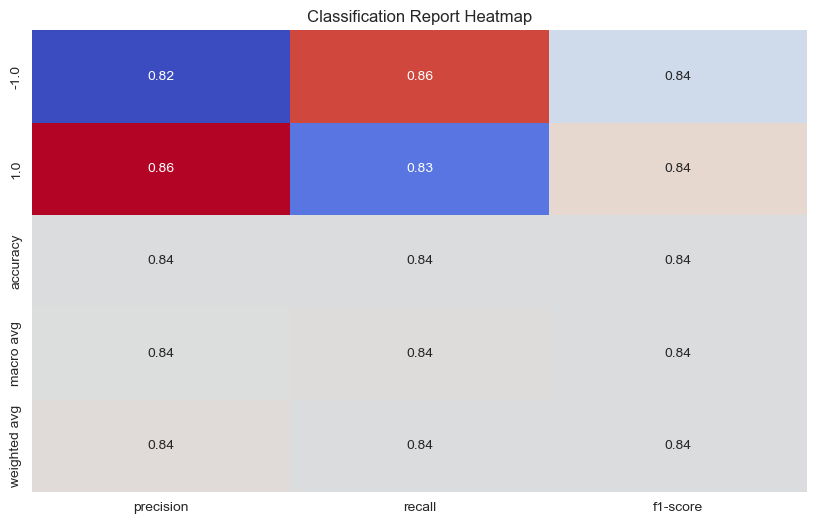

In [7]:
# Convert to DataFrame
report_df = pd.DataFrame(class_report_demo).transpose()
# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='coolwarm', cbar=False, fmt='.2g')
plt.title('Classification Report Heatmap')
plt.show()